In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
with open('WikiData.txt', 'r') as f:
    dat = pd.read_csv(f, sep='\t', header=None, names=['a', 'b']).sort_values(by='a')

In [58]:
# 数据总览
dat.head()

,a,b
25,3,604
27,3,8283
26,3,611
24,3,590
23,3,586


In [59]:
# 链接数量
len(dat)

103689

In [50]:
# out节点的数量
nodes_out = dat.a.unique()
len(nodes_out)

6110

In [51]:
# in节点的数量
nodes_in = dat.b.unique()
len(nodes_in)

2381

In [48]:
# 节点总数
nodes = np.unique(np.hstack([dat.a.values, dat.b.values]))
len(nodes)

7115

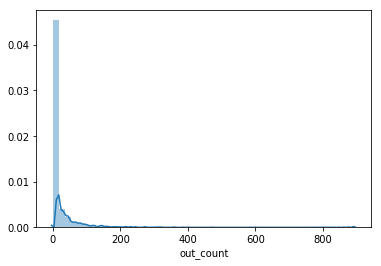

In [37]:
# 节点出度的分布
out_stat = dat.groupby('a')['b'].count().reset_index().rename(columns={'b': 'out_count'})
sns.distplot(out_stat['out_count'])

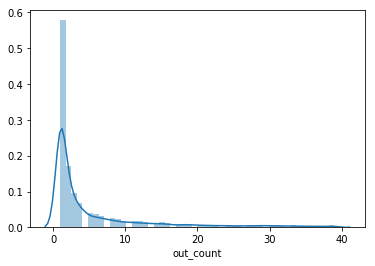

In [43]:
# 节点出度小于40的分布（for better visualization）
sns.distplot(out_stat[out_stat['out_count'] < 40]['out_count'])

In [62]:
# 节点出度的统计信息
out_stat['out_count'].describe()

count    6110.000000
mean       16.970376
std        45.179621
min         1.000000
25%         1.000000
50%         2.000000
75%        12.000000
max       893.000000
Name: out_count, dtype: float64

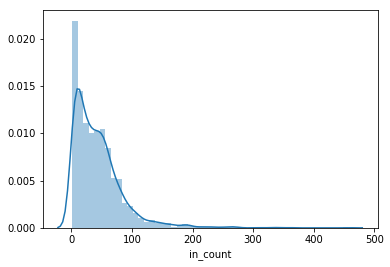

In [45]:
# 节点入度的分布
in_stat = dat.groupby('b')['a'].count().reset_index().rename(columns={'a': 'in_count'})
sns.distplot(in_stat['in_count'])

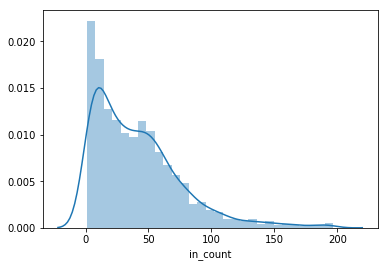

In [46]:
# 节点入度小于40的分布（for better visualization）
sns.distplot(in_stat[in_stat['in_count'] < 200]['in_count'])

In [47]:
# 节点入度的统计信息
in_stat['in_count'].describe()

count    2381.000000
mean       43.548509
std        41.799570
min         1.000000
25%        13.000000
50%        34.000000
75%        60.000000
max       457.000000
Name: in_count, dtype: float64

In [56]:
# 0出度节点数量（dead end）
nodes_0out = np.setdiff1d(nodes, nodes_out)
len(nodes_0out)

1005

In [57]:
# 0入度节点数量（dead start）
nodes_0in = np.setdiff1d(nodes, nodes_in)
len(nodes_0in)

4734